# GRU IMPLEMENTATION

In [1]:
%run Data_Preprocessing.ipynb

In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense,GRU

In [3]:
y_train.shape

(93, 3, 1)

In [22]:
# Initialising the RNN
model = Sequential()

model.add(GRU(units = 50, return_sequences = True, input_shape = (x_train.shape[1],7)))
model.add(Dropout(0.2))

# Adding a second GRU layer and Dropout layer
model.add(GRU(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third GRU layer and Dropout layer
model.add(GRU(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(GRU(units = 128, return_sequences = True))
model.add(GRU(units = 128, return_sequences = True))
model.add(GRU(units = 128, return_sequences = True))

model.add(GRU(units = 64, return_sequences = True))

# Adding a fourth GRU layer and and Dropout layer
model.add(GRU(units = 50))
model.add(Dropout(0.1))

# Adding the output layer
model.add(Dense(units = 1))

In [23]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_23 (GRU)                 (None, 3, 50)             8850      
_________________________________________________________________
dropout_18 (Dropout)         (None, 3, 50)             0         
_________________________________________________________________
gru_24 (GRU)                 (None, 3, 50)             15300     
_________________________________________________________________
dropout_19 (Dropout)         (None, 3, 50)             0         
_________________________________________________________________
gru_25 (GRU)                 (None, 3, 50)             15300     
_________________________________________________________________
dropout_20 (Dropout)         (None, 3, 50)             0         
_________________________________________________________________
gru_26 (GRU)                 (None, 3, 128)           

In [40]:
 #compile and fit the model on 30 epochs
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])
history = model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs = 60, batch_size = 50,verbose=1)

Epoch 1/60
2/2 [==============================] - ETA: 0s - loss: 0.1574 - accuracy: 0.78 - 1s 729ms/step - loss: 0.1831 - accuracy: 0.7670 - val_loss: 0.1612 - val_accuracy: 0.7849
Epoch 2/60
2/2 [==============================] - ETA: 0s - loss: 0.1721 - accuracy: 0.75 - 0s 15ms/step - loss: 0.1709 - accuracy: 0.7670 - val_loss: 0.1652 - val_accuracy: 0.8065
Epoch 3/60
2/2 [==============================] - ETA: 0s - loss: 0.1691 - accuracy: 0.80 - 0s 15ms/step - loss: 0.1710 - accuracy: 0.7921 - val_loss: 0.1586 - val_accuracy: 0.7957
Epoch 4/60
2/2 [==============================] - ETA: 0s - loss: 0.1570 - accuracy: 0.80 - 0s 14ms/step - loss: 0.1651 - accuracy: 0.7814 - val_loss: 0.1565 - val_accuracy: 0.7849
Epoch 5/60
2/2 [==============================] - ETA: 0s - loss: 0.1597 - accuracy: 0.80 - 0s 14ms/step - loss: 0.1642 - accuracy: 0.7778 - val_loss: 0.1540 - val_accuracy: 0.7957
Epoch 6/60
2/2 [==============================] - ETA: 0s - loss: 0.1599 - accuracy: 0.75 - 0s

In [41]:
res = model.predict(x_test)

In [42]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
#loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
#print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

1/1 [==============================] - ETA: 0s - loss: 0.1214 - accuracy: 0.80 - 0s 3ms/step - loss: 0.1214 - accuracy: 0.8065
Test: accuracy = 0.806452  ;  loss = 0.121384


In [43]:
print(accuracy, loss)

0.806451678276062 0.12138444930315018


In [49]:
for i in res:
    if i[0]>= 0.5:
        i[0]=1
    else:
        i[0]=0

In [50]:
y_val = [0] * 31
for i in range(31):
    y_val[i] = y_test[i][2]

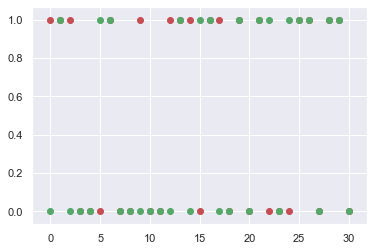

In [46]:
plt.scatter(range(31),res,c="r")
plt.scatter(range(31),y_val,c="g")
plt.show()

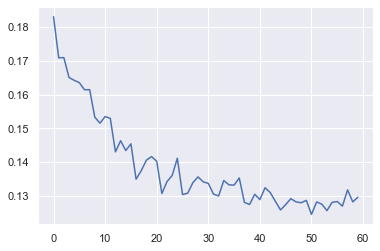

In [51]:
plt.plot(history.history['loss'])
plt.show()

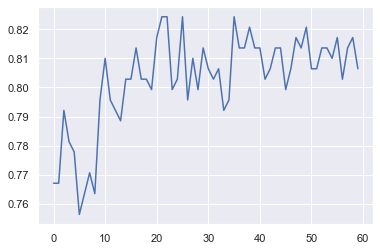

In [52]:
plt.plot(history.history['accuracy'])
plt.show()

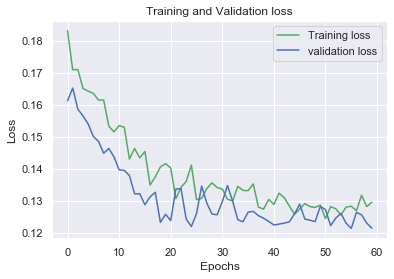

In [60]:
t_loss = history.history['loss']
v_loss = history.history['val_loss']
epochs = range(0,60)
plt.plot(epochs, t_loss, 'g', label='Training loss')
plt.plot(epochs, v_loss, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

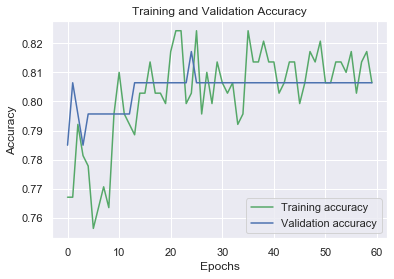

In [62]:
t_acc = history.history['accuracy']
v_acc = history.history['val_accuracy']
epochs = range(0,60)
plt.plot(epochs, t_acc, 'g', label='Training accuracy')
plt.plot(epochs, v_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()